In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math



In [2]:
XandY = pd.read_csv('X_and_Y_7-Day Lag.csv', dtype = float)

In [3]:
XandY

,Shanghai,Shanghai 2,Shanghai 2.1,Shanghai 2.2,Shanghai 2.3,Shanghai 2.4,Shanghai 2.5,DOW,DOW.1,DOW.2,...,DOW.5,DOW.6,Y,Y.1,Y.2,Y.3,Y.4,Y.5,Y.6,Y.7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2400
1,104.39,NaN,NaN,NaN,NaN,NaN,NaN,921.340027,NaN,NaN,...,NaN,NaN,5.2400,NaN,NaN,NaN,NaN,NaN,NaN,5.2400
2,109.13,104.39,NaN,NaN,NaN,NaN,NaN,925.500000,921.340027,NaN,...,NaN,NaN,5.2400,5.2400,NaN,NaN,NaN,NaN,NaN,5.2400
3,114.55,109.13,104.39,NaN,NaN,NaN,NaN,921.729980,925.500000,921.340027,...,NaN,NaN,5.2400,5.2400,5.2400,NaN,NaN,NaN,NaN,5.2400
4,120.25,114.55,109.13,104.39,NaN,NaN,NaN,925.690002,921.729980,925.500000,...,NaN,NaN,5.2400,5.2400,5.2400,5.2400,NaN,NaN,NaN,5.2400
5,125.27,120.25,114.55,109.13,104.39,NaN,NaN,920.409973,925.690002,921.729980,...,NaN,NaN,5.2400,5.2400,5.2400,5.2400,5.2400,NaN,NaN,5.2400
6,125.28,125.27,120.25,114.55,109.13,104.39,NaN,920.369995,920.409973,925.690002,...,921.340027,NaN,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,NaN,5.2400
7,126.45,125.28,125.27,120.25,114.55,109.13,104.39,920.609985,920.369995,920.409973,...,925.500000,921.340027,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400
8,127.61,126.45,125.28,125.27,120.25,114.55,109.13,914.890015,920.609985,920.369995,...,921.729980,925.500000,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400
9,128.84,127.61,126.45,125.28,125.27,120.25,114.55,907.070007,914.890015,920.609985,...,925.690002,921.729980,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400,5.2400


In [4]:
def linRegress(XandY):
    tenp = (6886-3700)/10.0
    print(tenp)
    endLoc = int(6886-tenp)
    
    X = (np.array(XandY.iloc[3700:endLoc,0:20], dtype = float))
    
    #oneS = np.ones(np.size(X, axis = 0))
    #oneS = np.reshape(oneS, (oneS.size,1))
    #X = np.concatenate((oneS,X), axis = 1)
    #X = np.array(X,dtype=float)
    Y = np.array(XandY.iloc[3700:endLoc,21])
    Y = np.reshape(Y, (Y.size,1))
    xPrimeX = np.matmul(X.T,X)
    xPrimeXInv = np.linalg.inv(xPrimeX)
    #print(xPrimeXInv)
    xPrimeY = np.matmul(X.T,Y)
    coef = np.matmul(xPrimeXInv,xPrimeY)
    #print(coef)
    
    X = (np.array(XandY.iloc[(endLoc):(6886),0:20], dtype = float))
    Y = np.array(XandY.iloc[endLoc:(6886),21])
    Y = np.reshape(Y, (Y.size,1))
    
    predictedY = np.matmul(X,coef)
    scatterRange = range(0,Y.size)
    plt.plot(scatterRange,Y, label='Y')
    plt.plot(scatterRange,predictedY,label='Predicted')
    SSE = np.sum((Y-predictedY)**2)
    print('SSE: ',SSE)
    plt.legend()
    plt.show

In [5]:
#Moving Average
tenp = (6886-3700)/10.0
endLoc = int(6886-tenp)
def movingAverage(Y):
    ma_Y = np.copy(Y)
    for i in range(Y.size-3):
        ma_Y[i][0] = (Y[i-3][0]+Y[i-2][0]+Y[i-1][0]+Y[i][0]+Y[i+1][0]+Y[i+2][0]+Y[i+3][0])/7
    return(ma_Y)

<function matplotlib.pyplot.show(*args, **kw)>

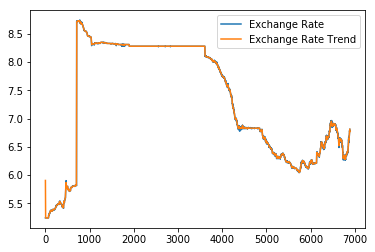

In [6]:
#Moving Average
tenp = (6886-3700)/10.0
endLoc = int(6886-tenp)
def movingAverage(Y):
    ma_Y = np.copy(Y)
    for i in range(Y.size-3):
        ma_Y[i][0] = (Y[i-3][0]+Y[i-2][0]+Y[i-1][0]+Y[i][0]+Y[i+1][0]+Y[i+2][0]+Y[i+3][0])/7
    return(ma_Y)

Y = np.array(XandY.iloc[0:6886,21])
Y = np.reshape(Y, (Y.size,1))
dow = np.array(XandY.iloc[0:6886,7])
dow = np.reshape(dow, (dow.size,1))
shangCom = np.array(XandY.iloc[0:6886,0])
shangCom = np.reshape(shangCom, (dow.size,1))


scatterRange = range(0,Y.size)
plt.plot(scatterRange,Y, label='Exchange Rate')
plt.plot(scatterRange,movingAverage(Y), label='Exchange Rate Trend')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

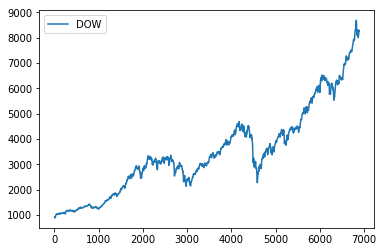

In [7]:
plt.plot(scatterRange,movingAverage(dow), label='DOW')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

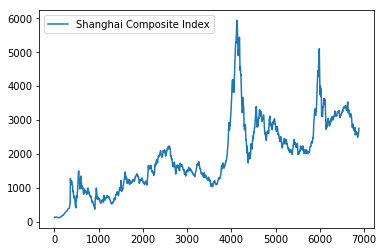

In [8]:

plt.plot(scatterRange,movingAverage(shangCom), label='Shanghai Composite Index')
plt.legend()
plt.show


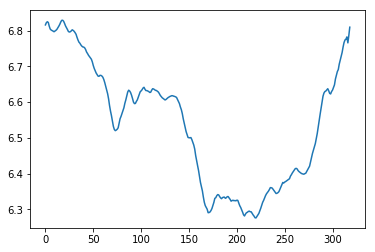

In [9]:
Y = np.array(XandY.iloc[endLoc:(6886),21])
Y = np.reshape(Y, (Y.size,1))

scatterRange = range(0,Y.size)
plt.plot(scatterRange,movingAverage(Y), label='Y Moving average')

318.6
SSE:  0.0900962530893456


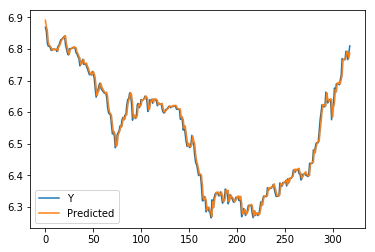

In [10]:
linRegress(XandY)

In [11]:
def linRegress(XandY):
    tenp = (6886-3700)/10.0
    print(tenp)
    endLoc = int(6886-tenp)
    
    X = (np.array(XandY.iloc[3700:endLoc,13:20], dtype = float))
    
    #oneS = np.ones(np.size(X, axis = 0))
    #oneS = np.reshape(oneS, (oneS.size,1))
    #X = np.concatenate((oneS,X), axis = 1)
    #X = np.array(X,dtype=float)
    Y = np.array(XandY.iloc[3700:endLoc,21])
    Y = np.reshape(Y, (Y.size,1))
    xPrimeX = np.matmul(X.T,X)
    xPrimeXInv = np.linalg.inv(xPrimeX)
    print(xPrimeXInv)
    xPrimeY = np.matmul(X.T,Y)
    coef = np.matmul(xPrimeXInv,xPrimeY)
    print(coef)
    X = (np.array(XandY.iloc[(endLoc):(6886),13:20], dtype = float))
    Y = np.array(XandY.iloc[endLoc:(6886),21])
    Y = np.reshape(Y, (Y.size,1))
    
    predictedY = np.matmul(X,coef)
    scatterRange = range(0,Y.size)
    plt.scatter(scatterRange,Y, label='Y')
    plt.scatter(scatterRange,predictedY,label='Predicted')
    SSE = np.sum((Y-predictedY)**2)
    print('SSE: ',SSE)
    plt.legend()
    plt.show

318.6
[[ 2.14905437e-10 -2.32038496e-06 -2.74017681e-07 -1.51301672e-07
   2.09989519e-07  2.69581909e-07  2.12121812e-06]
 [-2.32038496e-06  3.88608007e+00 -3.45043673e+00 -2.73592595e-01
  -2.95866005e-01  1.13100767e-01  2.25670555e-02]
 [-2.74017681e-07 -3.45043673e+00  6.94965390e+00 -3.20845085e+00
  -9.36028930e-03 -3.94697411e-01  1.13509488e-01]
 [-1.51301672e-07 -2.73592595e-01 -3.20845085e+00  6.96565962e+00
  -3.17919644e+00 -8.71442461e-03 -2.95581394e-01]
 [ 2.09989519e-07 -2.95866005e-01 -9.36028923e-03 -3.17919644e+00
   6.96595443e+00 -3.20933770e+00 -2.72357955e-01]
 [ 2.69581909e-07  1.13100768e-01 -3.94697411e-01 -8.71442467e-03
  -3.20933770e+00  6.95274260e+00 -3.45330653e+00]
 [ 2.12121812e-06  2.25670553e-02  1.13509488e-01 -2.95581394e-01
  -2.72357955e-01 -3.45330653e+00  3.88345682e+00]]
[[ 5.83391741e-07]
 [ 8.87671420e-01]
 [ 6.95028395e-02]
 [ 7.83192049e-02]
 [-2.66087442e-02]
 [ 2.13437614e-02]
 [-3.06935153e-02]]
SSE:  0.09044357120366141


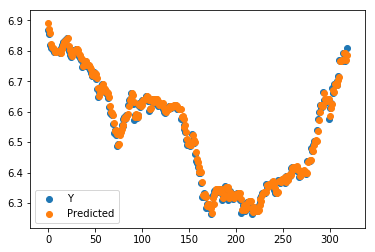

In [12]:
linRegress(XandY)

In [13]:
def linRegress(XandY):
    tenp = (6886-3700)/10.0
    print(tenp)
    endLoc = int(6886-tenp)
    
    X = (np.array(XandY.iloc[3700:endLoc,6:20], dtype = float))
    
    #oneS = np.ones(np.size(X, axis = 0))
    #oneS = np.reshape(oneS, (oneS.size,1))
    #X = np.concatenate((oneS,X), axis = 1)
    #X = np.array(X,dtype=float)
    Y = np.array(XandY.iloc[3700:endLoc,21])
    Y = np.reshape(Y, (Y.size,1))
    xPrimeX = np.matmul(X.T,X)
    xPrimeXInv = np.linalg.inv(xPrimeX)
    print(xPrimeXInv)
    xPrimeY = np.matmul(X.T,Y)
    coef = np.matmul(xPrimeXInv,xPrimeY)
    print(coef)
    X = (np.array(XandY.iloc[(endLoc):(6886),6:20], dtype = float))
    Y = np.array(XandY.iloc[endLoc:(6886),21])
    Y = np.reshape(Y, (Y.size,1))
    
    predictedY = np.matmul(X,coef)
    scatterRange = range(0,Y.size)
    plt.scatter(scatterRange,Y, label='Y')
    plt.scatter(scatterRange,predictedY,label='Predicted')
    SSE = np.sum((Y-predictedY)**2)
    print('SSE: ',SSE)
    plt.legend()
    plt.show

318.6
[[ 5.51833586e-10 -5.48088218e-11 -2.45185195e-11 -3.88557595e-12
   7.86409855e-12 -1.23977171e-11 -2.21606215e-11 -3.00750755e-11
   1.26486752e-06  2.76281795e-07  1.74063130e-07 -1.04841456e-07
  -1.51013964e-07 -1.59289960e-06]
 [-5.48088218e-11  1.55999002e-07 -1.43938250e-07 -4.63060827e-09
  -1.03585839e-08  8.00570082e-09  1.15431145e-09 -6.23578735e-09
  -5.30351229e-06  1.01236687e-05 -8.55560311e-06  1.41985964e-05
   7.73165718e-06 -1.82004532e-05]
 [-2.45185195e-11 -1.43938250e-07  2.88548793e-07 -1.39637099e-07
   5.17887305e-09 -1.80800844e-08  6.78991317e-09  1.17061706e-09
  -4.93207958e-06 -6.02938193e-06  1.88292357e-05 -2.31795864e-05
   7.23509202e-06  8.06186329e-06]
 [-3.88557596e-12 -4.63060827e-09 -1.39637099e-07  2.88702260e-07
  -1.39331649e-07  4.95393944e-09 -1.80697200e-08  8.02957103e-09
   4.68684728e-06 -9.19054836e-06 -6.29264306e-06  1.89234840e-05
  -2.32934772e-05  1.51550282e-05]
 [ 7.86409856e-12 -1.03585839e-08  5.17887305e-09 -1.39331649e

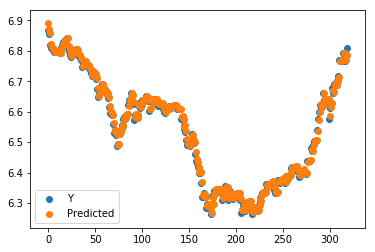

In [14]:
linRegress(XandY)

In [15]:
def linRegress(XandY):
    tenp = (6886-3700)/10.0
    print(tenp)
    endLoc = int(6886-tenp)
    
    X1 = (np.array(XandY.iloc[3700:endLoc,13:20], dtype = float))
    X2 = (np.array(XandY.iloc[3700:endLoc,0:6], dtype = float))
    X = np.concatenate((X1,X2),axis=1)
    
    #oneS = np.ones(np.size(X, axis = 0))
    #oneS = np.reshape(oneS, (oneS.size,1))
    #X = np.concatenate((oneS,X), axis = 1)
    #X = np.array(X,dtype=float)
    Y = np.array(XandY.iloc[3700:endLoc,21])
    Y = np.reshape(Y, (Y.size,1))
    xPrimeX = np.matmul(X.T,X)
    xPrimeXInv = np.linalg.inv(xPrimeX)
    print(xPrimeXInv)
    xPrimeY = np.matmul(X.T,Y)
    coef = np.matmul(xPrimeXInv,xPrimeY)
    print(coef)
    
    X1 = (np.array(XandY.iloc[(endLoc):(6886),13:20], dtype = float))
    X2 = (np.array(XandY.iloc[(endLoc):(6886),0:6], dtype = float))
    X = np.concatenate((X1,X2),axis=1)
    
    Y = np.array(XandY.iloc[endLoc:(6886),21])
    Y = np.reshape(Y, (Y.size,1))
    
    predictedY = np.matmul(X,coef)
    scatterRange = range(0,Y.size)
    plt.scatter(scatterRange,Y, label='Y')
    plt.scatter(scatterRange,predictedY,label='Predicted')
    SSE = np.sum((Y-predictedY)**2)
    print('SSE: ',SSE)
    plt.legend()
    plt.show

318.6
[[ 2.50386817e-10 -2.68000109e-06 -3.25465942e-07 -1.80284619e-07
   2.36595330e-07  3.15656528e-07  2.52268663e-06 -2.54387978e-11
   1.28084289e-11  8.63033125e-13 -1.43755025e-11 -1.11250057e-11
  -1.03093823e-10]
 [-2.68000109e-06  3.89166629e+00 -3.45227327e+00 -2.71635077e-01
  -2.98506128e-01  1.13982009e-01  1.82522749e-02  2.53846873e-06
  -4.71701472e-06  1.19170076e-05 -1.10105369e-05  1.32922118e-05
  -1.05530402e-05]
 [-3.25465942e-07 -3.45227327e+00  6.95504939e+00 -3.21220250e+00
  -7.21708817e-03 -3.98280101e-01  1.15116802e-01 -1.68010238e-05
   2.28661586e-05 -1.72259209e-05  2.21984786e-05 -2.13126979e-05
   1.04256740e-05]
 [-1.80284619e-07 -2.71635077e-01 -3.21220250e+00  6.97026409e+00
  -3.18160226e+00 -6.89326430e-03 -2.97823858e-01  7.67679428e-06
  -2.53086357e-05  2.28989753e-05 -1.63104347e-05  1.97537808e-05
  -8.61973216e-06]
 [ 2.36595330e-07 -2.98506128e-01 -7.21708832e-03 -3.18160226e+00
   6.97038148e+00 -3.21073560e+00 -2.72450241e-01  6.2245450

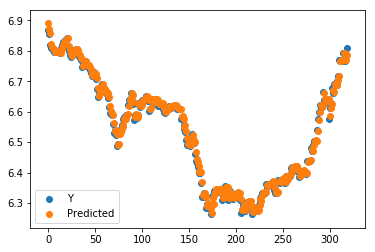

In [16]:
linRegress(XandY)